## I. Perkenalan
Nama : Fadhilah Amani Alam Aulia

Batch : 15

Dataset : Pima Indians Diabetes Database

Objective : Memprediksi apakah pasien menderita diabetes atau tidak

## II. Import Libraries
Bagian ini berisi semua library yang dibutuhkan dalam project ini.

In [1]:
# Mengimport library yang dibutuhkan

import joblib
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, confusion_matrix

## III. Data Loading
Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading yang dilakukan adalah:
- Mengakses dataset
- Mengganti nama kolom
- Mengecek ukuran dataset

In [2]:
# Mengakses dataset

data = pd.read_csv('h8dsft_Milestone2P1_fadhilah_amani_alam_aulia.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
# Melihat 10 baris pertama pada dataset

data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
# Melihat 10 baris terakhir pada dataset

data.tail(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
760,2,88,58,26,16,28.4,0.766,22,0
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
# Mengganti nama kolom 'Outcome' menjadi 'Result'

data.rename(columns={'Outcome': 'Result'}, inplace=True)
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Result
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
# Menampilkan describe data

data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Result
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
# Mengecek ukuran dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Result                    768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Berdasarkan data di atas, diketahui bahwa dataset ini terdiri dari 768 baris dan 9 kolom. Dataset ini terdiri dari dua tipe data, yaitu float64 dan int64, dan memakan memori sebesar 54.1 kb.

## IV. Exploratory Data Analysis (EDA)
Bagian ini berisi explorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

In [8]:
# Menampilkan nilai data unique di setiap kolom

for col in data:
  print(col, data[col].unique())
  print('')

Pregnancies [ 6  1  8  0  5  3 10  2  4  7  9 11 13 15 17 12 14]

Glucose [148  85 183  89 137 116  78 115 197 125 110 168 139 189 166 100 118 107
 103 126  99 196 119 143 147  97 145 117 109 158  88  92 122 138 102  90
 111 180 133 106 171 159 146  71 105 101 176 150  73 187  84  44 141 114
  95 129  79   0  62 131 112 113  74  83 136  80 123  81 134 142 144  93
 163 151  96 155  76 160 124 162 132 120 173 170 128 108 154  57 156 153
 188 152 104  87  75 179 130 194 181 135 184 140 177 164  91 165  86 193
 191 161 167  77 182 157 178  61  98 127  82  72 172  94 175 195  68 186
 198 121  67 174 199  56 169 149  65 190]

BloodPressure [ 72  66  64  40  74  50   0  70  96  92  80  60  84  30  88  90  94  76
  82  75  58  78  68 110  56  62  85  86  48  44  65 108  55 122  54  52
  98 104  95  46 102 100  61  24  38 106 114]

SkinThickness [35 29  0 23 32 45 19 47 38 30 41 33 26 15 36 11 31 37 42 25 18 24 39 27
 21 34 10 60 13 20 22 28 54 40 51 56 14 17 50 44 12 46 16  7 52 43 48  8
 49 6

Berikut ini merupakan keterangan dari masing-masing kolom pada dataset:
- 'Pregnancies':<br>
Kolom ini mempresentasikan berapa kali wanita tersebut hamil sepanjang hidupnya.
- 'Glucose':<br>
Kolom ini mempresentasikan konsentrasi glukosa plasma pada 2 jam dalam tes toleransi glukosa.
- 'BloodPressure': <br>
Kolom ini mempresentasikan nilai tekanan darah diastolik dalam (mm/Hg) ketika jantung rileks setelah kontraksi.
- 'SkinThickness': <br>
Kolom ini mempresentasikan ketebalan lipatan kulit trisep dan memperkirakan lemak tubuh (mm) yang diukur pada lengan.
- 'Insulin': <br>
Kolom ini mempresentasikan tingkat insulin 2 jam insulin serum dalam satuan mu U/ml.
- 'BMI': <br>
Kolom ini mempresentasikan nilai indeks massa tubuh, dan merupakan indikator kesehatan seseorang.
- 'DiabetesPedigreeFunction': <br>
Kolom ini mempresentasikan kemungkinan terkena diabetes berdasarkan indikator riwayat diabetes dalam keluarga.
- 'Age': <br>
Kolom ini mempresentasikan umur wanita.
- 'Result': <br>
Kolom ini mempresentasikan apakah wanita tersebut mengidap penyakit diabetes atau tidak. Kolom ini memiliki dua nilai, yaitu:
    - (0) tidak mengidap diabetes
    - (1) mengidap diabetes

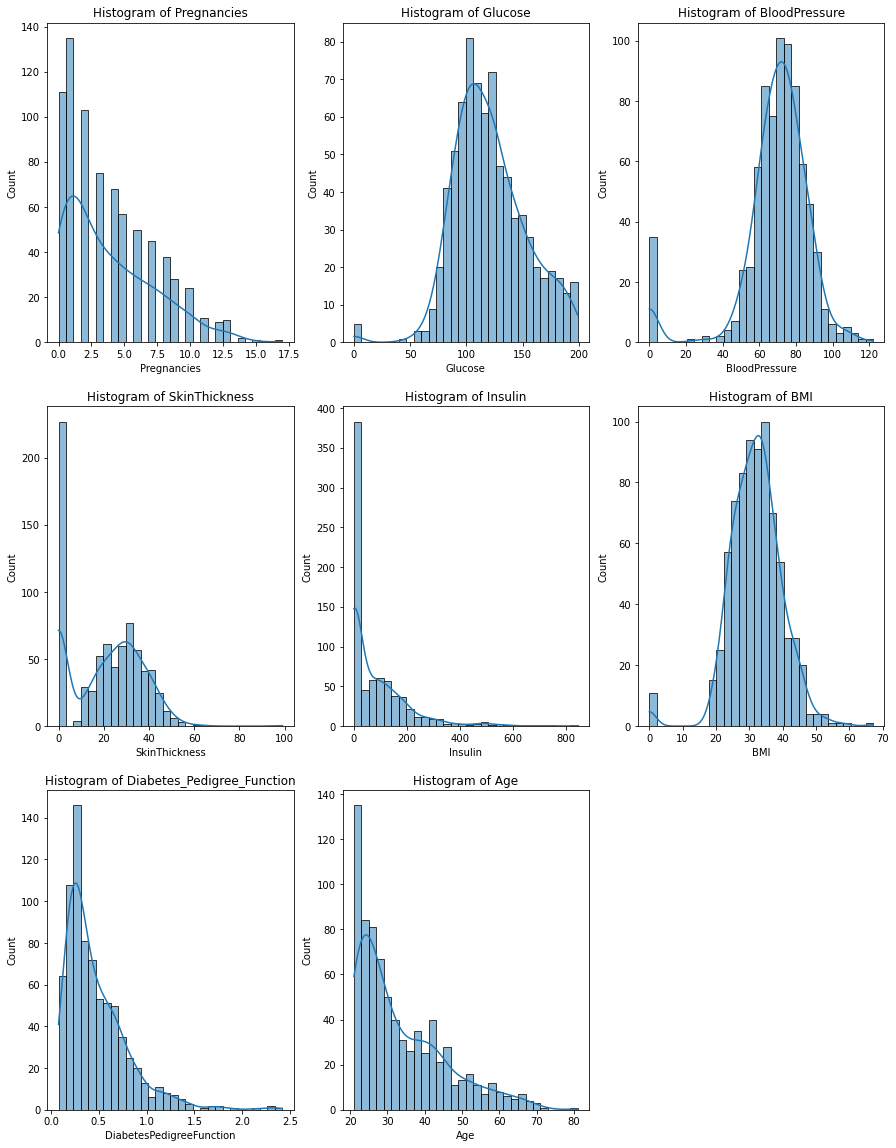

In [9]:
# Visualisasi data untuk kolom numerik

plt.figure(figsize=(15,20))

plt.subplot(3,3,1)
sns.histplot(data['Pregnancies'], bins=30, kde=True)
plt.title('Histogram of Pregnancies')

plt.subplot(3,3,2)
sns.histplot(data['Glucose'], bins=30, kde=True)
plt.title('Histogram of Glucose')

plt.subplot(3,3,3)
sns.histplot(data['BloodPressure'], bins=30, kde=True)
plt.title('Histogram of BloodPressure')

plt.subplot(3,3,4)
sns.histplot(data['SkinThickness'], bins=30, kde=True)
plt.title('Histogram of SkinThickness')

plt.subplot(3,3,5)
sns.histplot(data['Insulin'], bins=30, kde=True)
plt.title('Histogram of Insulin')

plt.subplot(3,3,6)
sns.histplot(data['BMI'], bins=30, kde=True)
plt.title('Histogram of BMI')

plt.subplot(3,3,7)
sns.histplot(data['DiabetesPedigreeFunction'], bins=30, kde=True)
plt.title('Histogram of Diabetes_Pedigree_Function')

plt.subplot(3,3,8)
sns.histplot(data['Age'], bins=30, kde=True)
plt.title('Histogram of Age')

plt.show()

Berdasarkan data grafik histogram di atas, dapat diketahui bahwa 'Pregnancies', 'Skin_Thickness', 'Insulin', 'Diabetes_Pedigree_Function', dan 'Age' memiliki data yang terdistribusi secara right-skewed, atau condong ke kanan. Sedangkan untuk 'Glucose', 'Blood_Pressure', dan 'BMI' cenderung memiliki data yang terdistribusi secara normal.

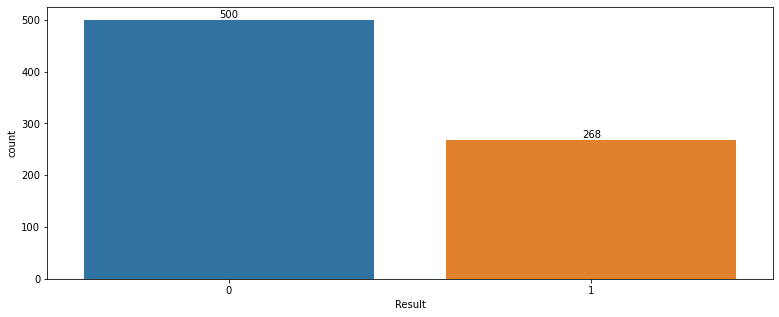

In [10]:
# Visualisasi data untuk kolom kategori

plt.figure(figsize = (13,5))
ax = sns.countplot(x='Result', data=data)
ax.bar_label(ax.containers[0])
plt.show()

Berdasarkan grafik countplot di atas, dapat diketahui bahwa pada dataset ini terdapat 500 pasien yang masuk ke kategori 0 atau tidak mengidap penyakit diabetes, dan 268 pasien yang masuk ke kategori 1 atau mengidap penyakit diabetes.

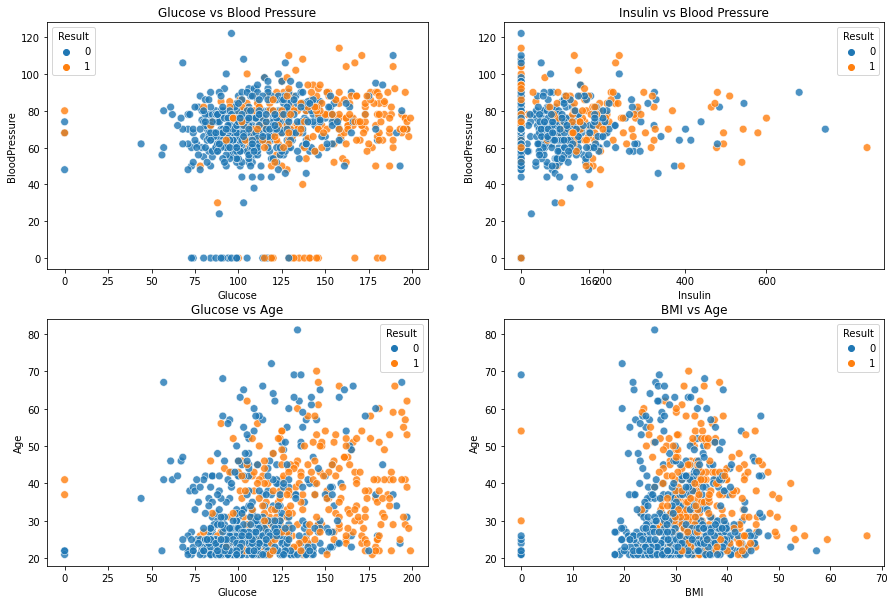

In [19]:
# Visualisasi Scatter Plot

plt.rcParams["figure.figsize"] = (15, 10)

plt.subplot(2,2,1)
sns.scatterplot(x='Glucose', y='BloodPressure', hue='Result', data=data, s=60, alpha=0.8)
plt.title('Glucose vs Blood Pressure')

plt.subplot(2,2,2)
sns.scatterplot(x='Insulin', y='BloodPressure', hue='Result', data=data, s=60, alpha=0.8)
plt.xticks([0, 166, 200, 400, 600])
plt.title('Insulin vs Blood Pressure')

plt.subplot(2,2,3)
sns.scatterplot(x='Glucose', y='Age', hue='Result', data=data, s=60, alpha=0.8)
plt.title('Glucose vs Age')

plt.subplot(2,2,4)
sns.scatterplot(x='BMI', y='Age', hue='Result', data=data, s=60, alpha=0.8)
plt.title('BMI vs Age')

plt.show()


Berdasarkan data di atas, dapat diketahui bahwa mayoritas orang yang tidak mengidap diabetes memiliki kadar glukosa dan insulin dalam kisaran normal. Serta untuk orang-orang yang berusia sekitar 21-40 tahun dengan nilai BMI kurang dari 30, tidak mengidap diabetes.

<AxesSubplot:>

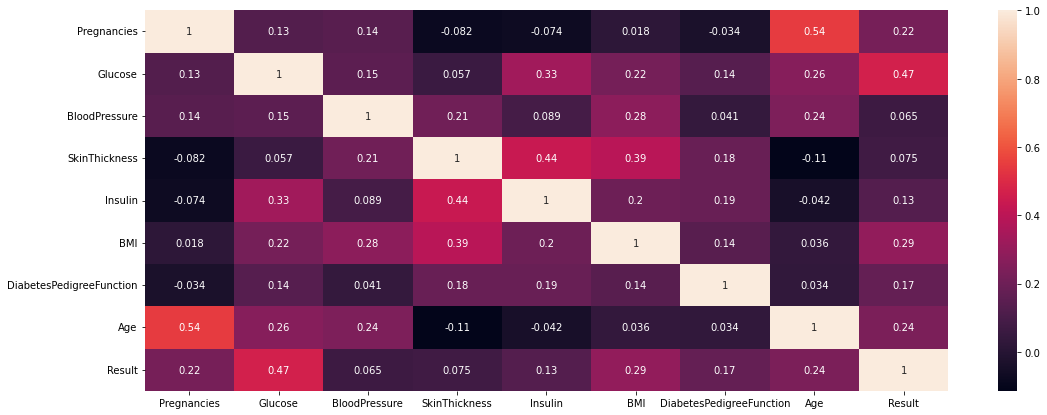

In [11]:
# Pembuatan heatmap untuk melihat korelasi antar variable

plt.figure(figsize = (18, 7))
sns.heatmap(data.corr(), annot = True)

Berdasarkan heatmap di atas, dapat diketahui bahwa urutan variabel yang memiliki korelasi yang tinggi dengan 'Result' adalah:
- 'Glucose', dengan nilai 0.47
- 'BMI', dengan nilai 0.29
- 'Age', dengan nilai 0.24
- 'Pregnancies', dengan 0.22
- 'DiabetesPedigreeFunction', dengan nilai 0.17
- 'Insulin', dengan nilai 0.13
- 'SkinThickness', dengan nilai 0.075
- 'BloodPressure', dengan nilai 0.065

## V. Data Preprocessing
Bagian ini berisi proses penyiapan data untuk proses pelatihan model. Data Preprocessing yang dilakukan adalah:
- Get Data for Model Inference
- Split Between 'X' (Features) and 'y' (Target)
- Handling Data Outlier
- Handling Missing Value
- Feature Selection
- Split Between Numerical Columns and Categorical Columns
- Building Pipelines

### V.1 Get Data for Model Inference

In [12]:
# Get Data for Model Inference

data_inf = data.sample(10, random_state = 41)
data_inf

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Result
679,2,101,58,17,265,24.2,0.614,23,0
345,8,126,88,36,108,38.5,0.349,49,0
486,1,139,62,41,480,40.7,0.536,21,0
20,3,126,88,41,235,39.3,0.704,27,0
457,5,86,68,28,71,30.2,0.364,24,0
498,7,195,70,33,145,25.1,0.163,55,1
723,5,117,86,30,105,39.1,0.251,42,0
70,2,100,66,20,90,32.9,0.867,28,1
411,1,112,72,30,176,34.4,0.528,25,0
713,0,134,58,20,291,26.4,0.352,21,0


In [13]:
# Remove Inference-Set from Dataset

data_train_test = data.drop(data_inf.index)
data_train_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Result
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [14]:
# Reset Index

data_train_test.reset_index(drop = True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)
data_inf

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Result
0,2,101,58,17,265,24.2,0.614,23,0
1,8,126,88,36,108,38.5,0.349,49,0
2,1,139,62,41,480,40.7,0.536,21,0
3,3,126,88,41,235,39.3,0.704,27,0
4,5,86,68,28,71,30.2,0.364,24,0
5,7,195,70,33,145,25.1,0.163,55,1
6,5,117,86,30,105,39.1,0.251,42,0
7,2,100,66,20,90,32.9,0.867,28,1
8,1,112,72,30,176,34.4,0.528,25,0
9,0,134,58,20,291,26.4,0.352,21,0


### V.2 Split Between 'X' (Features) and 'y' (target)

In [15]:
# Split between 'X' (features) and 'y' (target)

X = data_train_test.drop('Result', axis=1)
y = data_train_test['Result']
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
753,10,101,76,48,180,32.9,0.171,63
754,2,122,70,27,0,36.8,0.340,27
755,5,121,72,23,112,26.2,0.245,30
756,1,126,60,0,0,30.1,0.349,47


In [16]:
# Split antara Train-Set dan Test-Set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 41)

print('Train Size   : ', X_train.shape)
print('Test Size    : ', X_test.shape )

Train Size   :  (606, 8)
Test Size    :  (152, 8)


### V.3 Handling Data Outlier

In [18]:
# Membuat fungsi untuk pembuatan grafik histogram dan boxplot

def diagnostic_plots(df, variable):
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

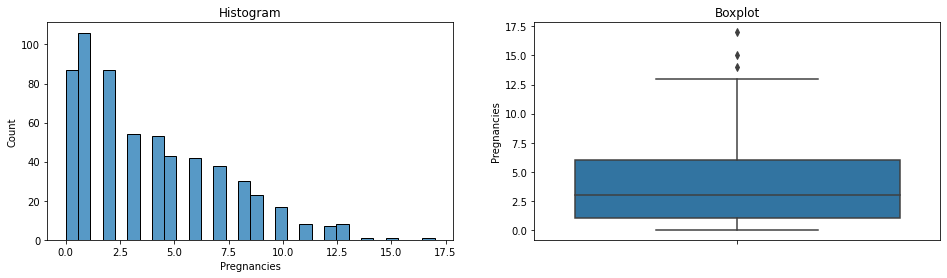


Skewness Value :  0.9048122448691418


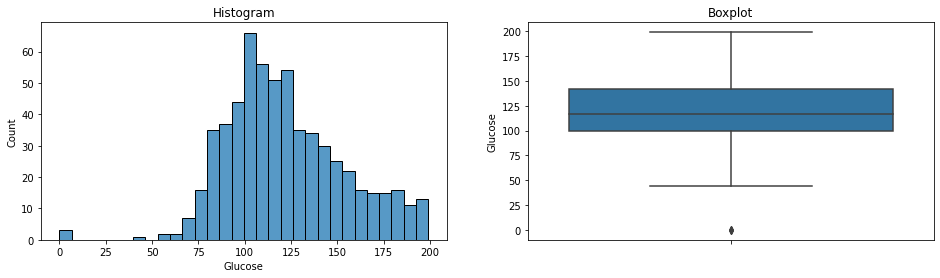


Skewness Value :  0.2395312794676028


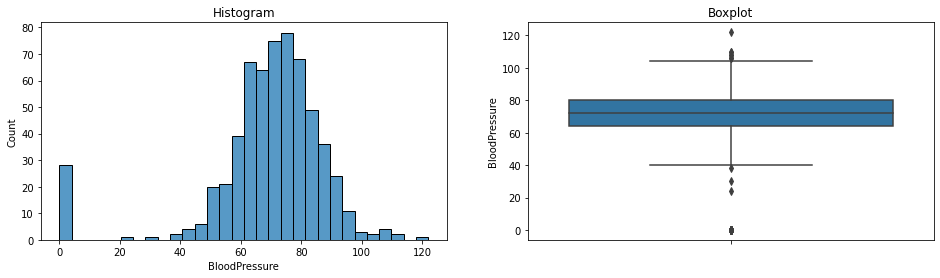


Skewness Value :  -1.864928608541142


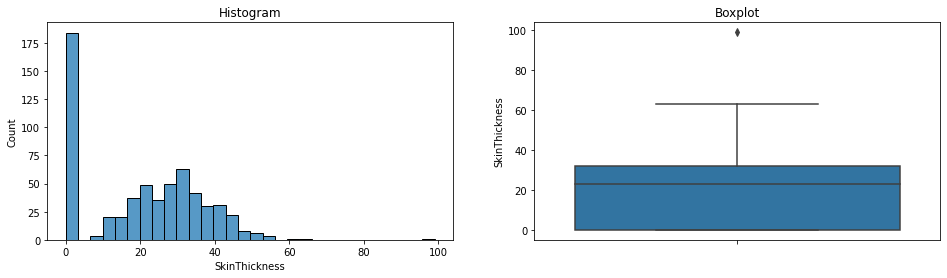


Skewness Value :  0.16099303635543893


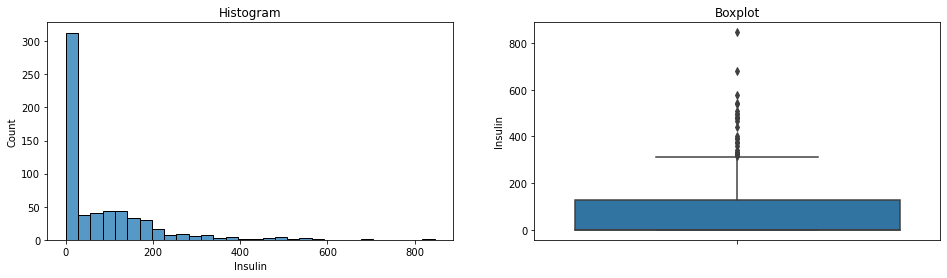


Skewness Value :  2.2799052011761884


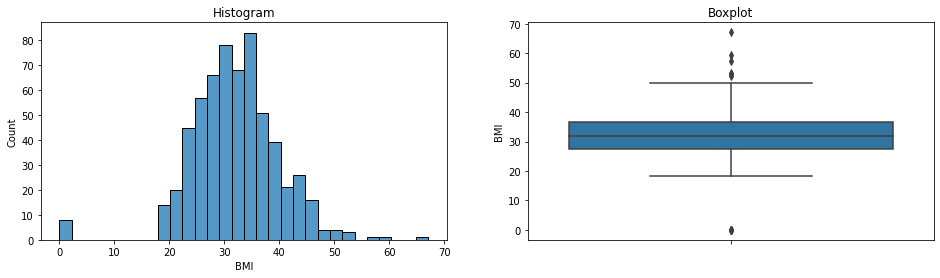


Skewness Value :  -0.31272986693079585


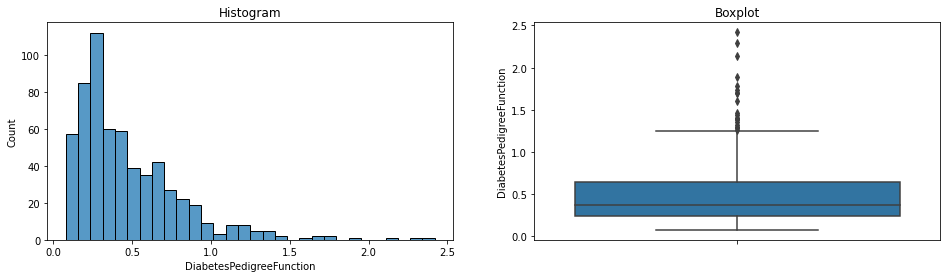


Skewness Value :  1.8570764709422656


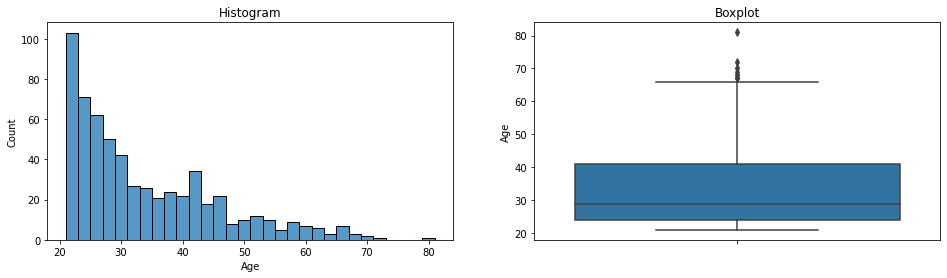


Skewness Value :  1.1197156753561452


In [19]:
# Mengecek apakah terdapat data outlier

diagnostic_plots(X_train, 'Pregnancies')
print('\nSkewness Value : ', X_train['Pregnancies'].skew())

diagnostic_plots(X_train, 'Glucose')
print('\nSkewness Value : ', X_train['Glucose'].skew())

diagnostic_plots(X_train, 'BloodPressure')
print('\nSkewness Value : ', X_train['BloodPressure'].skew())

diagnostic_plots(X_train, 'SkinThickness')
print('\nSkewness Value : ', X_train['SkinThickness'].skew())

diagnostic_plots(X_train, 'Insulin')
print('\nSkewness Value : ', X_train['Insulin'].skew())

diagnostic_plots(X_train, 'BMI')
print('\nSkewness Value : ', X_train['BMI'].skew())

diagnostic_plots(X_train, 'DiabetesPedigreeFunction')
print('\nSkewness Value : ', X_train['DiabetesPedigreeFunction'].skew())

diagnostic_plots(X_train, 'Age')
print('\nSkewness Value : ', X_train['Age'].skew())

Berdasarkan grafik di atas, diketahui terdapat beberapa data outlier. Tetapi, data-data outlier tersebut tidak akan ditangani, karena data-data tersebut merupakan data alamiah/aktual, bukan data yang menjadi outlier karena adanya kesalahan input data.

### V.4 Handling Missing Value

Pada dataset ini, terdapat beberapa kolom yang memiliki nilai 0 dan hal tersebut tidak masuk akal untuk kolom-kolom tersebut, maka nilai 0 pada kolom-kolom tersebut akan dianggap sebagai missing value. Kolom-kolom tersebut adalah:
- 'Glucose'
- 'Blood_Pressure'
- 'Skin_Thickness'
- 'Insulin'
- 'BMI'

In [20]:
# Mengubah nilai 0 menjadi NaN pada X_train

X_train[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = X_train[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [21]:
# Mengecek jumlah missing value pada X_train

X_train.isnull().sum()

Pregnancies                   0
Glucose                       3
BloodPressure                28
SkinThickness               184
Insulin                     306
BMI                           8
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

In [22]:
# Menangani missing value pada X_train dengan melakukan imputasi median dan mean

mean_gc = X_train['Glucose'].mean()
X_train['Glucose'] = X_train['Glucose'].fillna(mean_gc)

mean_bp = X_train['BloodPressure'].mean()
X_train['BloodPressure'] = X_train['BloodPressure'].fillna(mean_bp)

mean_bmi = X_train['BMI'].mean()
X_train['BMI'] = X_train['BMI'].fillna(mean_bmi)

median_i = X_train['Insulin'].median()
X_train['Insulin'] = X_train['Insulin'].fillna(median_i)

median_st = X_train['SkinThickness'].median()
X_train['SkinThickness'] = X_train['SkinThickness'].fillna(median_st)


# Mengecek kembali jumlah missing value pada X_train

X_train.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

In [23]:
# Mengubah nilai 0 menjadi NaN pada X_test

X_test[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = X_test[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [24]:
# Mengecek jumlah missing value pada X_test

X_test.isnull().sum()

Pregnancies                  0
Glucose                      2
BloodPressure                7
SkinThickness               43
Insulin                     68
BMI                          3
DiabetesPedigreeFunction     0
Age                          0
dtype: int64

In [25]:
# Menangani missing value pada X_test dengan melakukan imputasi median dan mean

mean_gc1 = X_test['Glucose'].mean()
X_test['Glucose'] = X_test['Glucose'].fillna(mean_gc1)

mean_bp1 = X_test['BloodPressure'].mean()
X_test['BloodPressure'] = X_test['BloodPressure'].fillna(mean_bp1)

mean_bmi1 = X_test['BMI'].mean()
X_test['BMI'] = X_test['BMI'].fillna(mean_bmi1)

median_i1 = X_test['Insulin'].median()
X_test['Insulin'] = X_test['Insulin'].fillna(median_i1)

median_st1 = X_test['SkinThickness'].median()
X_test['SkinThickness'] = X_test['SkinThickness'].fillna(median_st1)


# Mengecek kembali jumlah missing value pada X_train

X_test.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

In [27]:
# Mengecek jumlah missing value pada y_train

y_train.isnull().sum()

0

In [28]:
# Mengecek jumlah missing value pada y_test

y_test.isnull().sum()

0

### V.5 Feature Selection

In [29]:
# Menampilkan data X_train

X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
477,4,85.0,58.0,22.0,49.0,27.8,0.306,28
473,8,126.0,74.0,38.0,75.0,25.9,0.162,39
452,1,135.0,54.0,29.0,127.5,26.7,0.687,62
294,2,146.0,70.0,38.0,360.0,28.0,0.337,29
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
...,...,...,...,...,...,...,...,...
407,6,102.0,90.0,39.0,127.5,35.7,0.674,28
601,0,152.0,82.0,39.0,272.0,41.5,0.270,27
243,9,184.0,85.0,15.0,127.5,30.0,1.213,49
321,13,152.0,90.0,33.0,29.0,26.8,0.731,43


Berdasarkan heatmap di bagian EDA, variable yang memiliki korelasi tinggi dengan 'Result' adalah 'Glucose', 'BMI', 'Age', 'Pregnancies', 'Diabetes_Pedigree_Function', dan 'Insulin'. Maka variable 'Skin_Thickness' dan 'Blood_Pressure' akan dihapus.


In [30]:
# Menghapus kolom-kolom yang tidak digunakan pada X_train

X_train = X_train[['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
X_train

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age
477,4,85.0,49.0,27.8,0.306,28
473,8,126.0,75.0,25.9,0.162,39
452,1,135.0,127.5,26.7,0.687,62
294,2,146.0,360.0,28.0,0.337,29
3,1,89.0,94.0,28.1,0.167,21
...,...,...,...,...,...,...
407,6,102.0,127.5,35.7,0.674,28
601,0,152.0,272.0,41.5,0.270,27
243,9,184.0,127.5,30.0,1.213,49
321,13,152.0,29.0,26.8,0.731,43


In [31]:
# Menghapus kolom-kolom yang tidak digunakan pada X_test

X_test = X_test[['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
X_test

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age
536,4,84.0,56.0,39.5,0.159,25
707,3,173.0,185.0,33.8,0.970,31
191,11,135.0,115.0,52.3,0.578,40
45,1,146.0,115.0,29.7,0.564,29
732,1,109.0,116.0,28.5,0.219,22
...,...,...,...,...,...,...
566,2,98.0,120.0,34.7,0.198,22
455,9,120.0,56.0,20.8,0.733,48
328,8,118.0,115.0,23.1,1.476,46
361,4,147.0,293.0,34.9,0.385,30


### V.6 Split Between Numerical Columns and Categorical Columns

In [33]:
# Mendapatkan kolom numerikan dan kolom kategorikal

num_columns = X_train[['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']].columns.tolist()

print('Numerical Columns di X_train   : ', num_columns)

num_columns1 = X_test[['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']].columns.tolist()

print('\nNumerical Columns di X_test    : ', num_columns1)

Numerical Columns di X_train   :  ['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

Numerical Columns di X_test    :  ['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


### V.7 Building Pipelines

In [34]:
#scaling data dengan pipeline

num_trf = Pipeline([('scaler', MinMaxScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_trf, num_columns)
    ]
)

## VI. Model Definition
Bagian ini berisi cell untuk mendefinisikan model. Terdapat 4 model yang akan dipakai, yaitu:
- SVM
- KNN
- Naive Bayes
- Logistic Regression

Keempat model tersebut digunakan karena pada dataset ini variabel dependen/target yang digunakan adalah data kategori, yaitu 'Result', dengan nilai '0' untuk tidak mengidap diabetes dan '1' untuk mengidap diabetes.

### 1. SVM

In [35]:
# Definisi Model SVM dengan pipeline

model_SVM = SVC()
pipe_svm = Pipeline([('preprocessor', preprocessor), ('svm', model_SVM)])

### 2. KNN

In [36]:
# Definisi Model KNN dengan pipeline

model_KNN = KNeighborsClassifier()
pipe_knn = Pipeline([('preprocessor', preprocessor), ('knn', model_KNN)])

### 3. Naive Bayes

In [37]:
# Definisi Model Naive Bayes dengan pipeline

model_NB = GaussianNB()
pipe_nb = Pipeline([('preprocessor', preprocessor), ('nb', model_NB)])

### 4. Logistic Regression

In [38]:
# Definisi Model Logistic Regression dengan pipeline

model_LR = LogisticRegression()
pipe_lr = Pipeline([('preprocessor', preprocessor), ('lr', model_LR)])

## VII. Model Training
Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. 

### 1. SVM

In [39]:
# Melakukan model training SVM dengan pipeline

pipe_svm.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Pregnancies', 'Glucose',
                                                   'Insulin', 'BMI',
                                                   'DiabetesPedigreeFunction',
                                                   'Age'])])),
                ('svm', SVC())])

### 2. KNN

In [40]:
# Melakukan model training KNN dengan pipeline

pipe_knn.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Pregnancies', 'Glucose',
                                                   'Insulin', 'BMI',
                                                   'DiabetesPedigreeFunction',
                                                   'Age'])])),
                ('knn', KNeighborsClassifier())])

### 3. Naive Bayes

In [41]:
# Melakukan model training Naive Bayes dengan pipeline

pipe_nb.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Pregnancies', 'Glucose',
                                                   'Insulin', 'BMI',
                                                   'DiabetesPedigreeFunction',
                                                   'Age'])])),
                ('nb', GaussianNB())])

### 4. Logistic Regression

In [42]:
# Melakukan model training Logistic Regression dengan pipeline

pipe_lr.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Pregnancies', 'Glucose',
                                                   'Insulin', 'BMI',
                                                   'DiabetesPedigreeFunction',
                                                   'Age'])])),
                ('lr', LogisticRegression())])

## VIII. Model Evaluation
Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model.

### 1. SVM

In [43]:
# Melakukan prediksi pada train-set dan test-set dengan SVM

y_pred_train =pipe_svm.predict(X_train)
y_pred_test = pipe_svm.predict(X_test)

#Data y_pred_train

y_pred_train

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,

In [44]:
# Melihat akurasi dari train-set dan test-set

print('accuracy score train : ', accuracy_score(y_train,y_pred_train))
print('accuracy score test : ', accuracy_score(y_test,y_pred_test))

accuracy score train :  0.8003300330033003
accuracy score test :  0.756578947368421


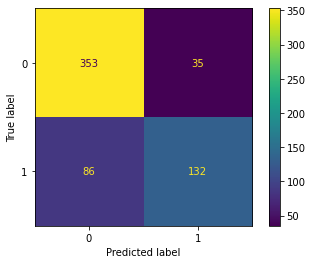

In [45]:
# Menampilkan confusion matrix untuk data train

cm = confusion_matrix(y_train, y_pred_train, labels=pipe_svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=pipe_svm.classes_)

disp.plot()
plt.show()

In [46]:
# Classification report pada data train

print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       388
           1       0.79      0.61      0.69       218

    accuracy                           0.80       606
   macro avg       0.80      0.76      0.77       606
weighted avg       0.80      0.80      0.79       606



Berdasarkan hasil confusion matrix dan classification report data train, dapat disimpulkan bahwa:
- Model SVM berhasil memprediksi sebanyak 91% atau 353 data yang ada pada kelas 0, yaitu kategori 'tidak mengidap diabetes' pada 'Result' dengan benar, tetapi 9% atau sebanyak 35 data salah prediksi. Data yang seharusnya masuk kelas 0, diprediksi oleh model masuk kelas 1, yaitu kategori 'mengidap diabetes' pada 'Result'.
- Selain itu Model SVM juga berhasil memprediksi sebanyak 61% atau 132 data yang ada pada kelas 1, yaitu kategori 'mengidap diabetes' pada 'Result' dengan benar, tetapi 39% atau sebanyak 86 data salah prediksi. Data yang seharusnya masuk kelas 1, diprediksi oleh model masuk kelas 0, yaitu kategori 'tidak mengidap diabetes' pada 'Result'.

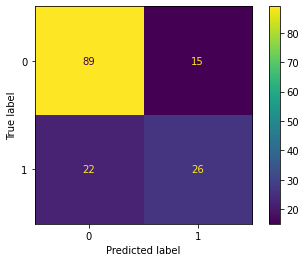

In [47]:
# Menampilkan confusion matrix untuk data test

cm = confusion_matrix(y_test, y_pred_test, labels=pipe_svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=pipe_svm.classes_)

disp.plot()
plt.show()

In [48]:
# Classification report pada data test

print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       104
           1       0.63      0.54      0.58        48

    accuracy                           0.76       152
   macro avg       0.72      0.70      0.71       152
weighted avg       0.75      0.76      0.75       152



Berdasarkan hasil confusion matrix dan classification report data test, dapat disimpulkan bahwa:
- Model SVM berhasil memprediksi sebanyak 86% atau 83 data yang ada pada kelas 0, yaitu kategori 'tidak mengidap diabetes' pada 'Result' dengan benar, tetapi 14% atau sebanyak 15 data salah prediksi. Data yang seharusnya masuk kelas 0, diprediksi oleh model masuk kelas 1, yaitu kategori 'mengidap diabetes' pada 'Result'.
- Selain itu Model SVM juga berhasil memprediksi sebanyak 54% atau 26 data yang ada pada kelas 1, yaitu kategori 'mengidap diabetes' pada 'Result' dengan benar, tetapi 46% atau sebanyak 22 data salah prediksi. Data yang seharusnya masuk kelas 1, diprediksi oleh model masuk kelas 0, yaitu kategori 'tidak mengidap diabetes' pada 'Result'.

In [49]:
# Menampikan data cross validation

mean_SVM = cross_val_score(pipe_svm, X_train, y_train, cv=5).mean()
std_SVM = cross_val_score(pipe_svm, X_train, y_train, cv=5).std()
print(mean_SVM)
print(std_SVM)

0.772280178837556
0.023682706880427472


### 2. KNN

In [50]:
# Melakukan prediksi pada train-set dan test-set dengan KNN

y_pred_train1 = pipe_knn.predict(X_train)
y_pred_test1 = pipe_knn.predict(X_test)

#Data y_pred_train

y_pred_train1

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,

In [51]:
# Melihat akurasi dari train-set dan test-set

print('accuracy score train : ', accuracy_score(y_train,y_pred_train1))
print('accuracy score test : ', accuracy_score(y_test,y_pred_test1))

accuracy score train :  0.8399339933993399
accuracy score test :  0.7631578947368421


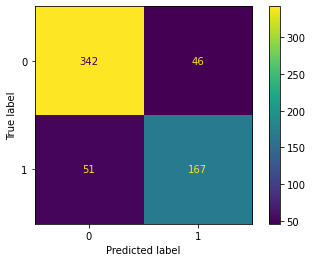

In [52]:
# Menampilkan confusion matrix untuk data train

cm = confusion_matrix(y_train, y_pred_train1, labels=pipe_knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=pipe_knn.classes_)

disp.plot()
plt.show()

In [53]:
# Classification report pada data train

print(classification_report(y_train,y_pred_train1))

              precision    recall  f1-score   support

           0       0.87      0.88      0.88       388
           1       0.78      0.77      0.77       218

    accuracy                           0.84       606
   macro avg       0.83      0.82      0.83       606
weighted avg       0.84      0.84      0.84       606



Berdasarkan hasil confusion matrix dan classification report data train, dapat disimpulkan bahwa:
- Model KNN berhasil memprediksi sebanyak 88% atau 342 data yang ada pada kelas 0, yaitu kategori 'tidak mengidap diabetes' pada 'Result' dengan benar, tetapi 12% atau sebanyak 46 data salah prediksi. Data yang seharusnya masuk kelas 0, diprediksi oleh model masuk kelas 1, yaitu kategori 'mengidap diabetes' pada 'Result'.
- Selain itu Model SVM juga berhasil memprediksi sebanyak 77% atau 167 data yang ada pada kelas 1, yaitu kategori 'mengidap diabetes' pada 'Result' dengan benar, tetapi 23% atau sebanyak 51 data salah prediksi. Data yang seharusnya masuk kelas 1, diprediksi oleh model masuk kelas 0, yaitu kategori 'tidak mengidap diabetes' pada 'Result'.

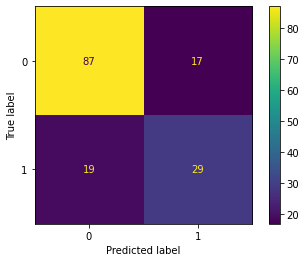

In [54]:
# Menampilkan confusion matrix untuk data test

cm = confusion_matrix(y_test, y_pred_test1, labels=pipe_knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=pipe_knn.classes_)

disp.plot()
plt.show()

In [55]:
# Classification report pada data test

print(classification_report(y_test,y_pred_test1))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       104
           1       0.63      0.60      0.62        48

    accuracy                           0.76       152
   macro avg       0.73      0.72      0.72       152
weighted avg       0.76      0.76      0.76       152



Berdasarkan hasil confusion matrix dan classification report data test, dapat disimpulkan bahwa:
- Model KNN berhasil memprediksi sebanyak 84% atau 87 data yang ada pada kelas 0, yaitu kategori 'tidak mengidap diabetes' pada 'Result' dengan benar, tetapi 16% atau sebanyak 17 data salah prediksi. Data yang seharusnya masuk kelas 0, diprediksi oleh model masuk kelas 1, yaitu kategori 'mengidap diabetes' pada 'Result'.
- Selain itu Model SVM juga berhasil memprediksi sebanyak 60% atau 29 data yang ada pada kelas 1, yaitu kategori 'mengidap diabetes' pada 'Result' dengan benar, tetapi 40% atau sebanyak 19 data salah prediksi. Data yang seharusnya masuk kelas 1, diprediksi oleh model masuk kelas 0, yaitu kategori 'tidak mengidap diabetes' pada 'Result'.

In [56]:
# Menampikan data cross validation

mean_KNN = cross_val_score(pipe_knn, X_train, y_train, cv=5).mean()
std_KNN = cross_val_score(pipe_knn, X_train, y_train, cv=5).std()
print(mean_KNN)
print(std_KNN)

0.7391952309985097
0.048419204498983306


### 3. Naive Bayes

In [57]:
# Melakukan prediksi pada train-set dan test-set dengan Naive Bayes

y_pred_train2 = pipe_nb.predict(X_train)
y_pred_test2 = pipe_nb.predict(X_test)

#Data y_pred_train

y_pred_train2

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,

In [58]:
# Melihat akurasi dari train-set dan test-set

print('accuracy score train : ', accuracy_score(y_train,y_pred_train2))
print('accuracy score test : ', accuracy_score(y_test,y_pred_test2))

accuracy score train :  0.764026402640264
accuracy score test :  0.7763157894736842


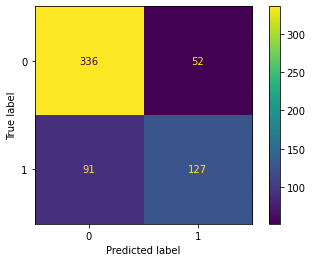

In [59]:
# Menampilkan confusion matrix untuk data train

cm = confusion_matrix(y_train, y_pred_train2, labels=pipe_nb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=pipe_nb.classes_)

disp.plot()
plt.show()

In [60]:
# Classification report pada data train

print(classification_report(y_train,y_pred_train2))

              precision    recall  f1-score   support

           0       0.79      0.87      0.82       388
           1       0.71      0.58      0.64       218

    accuracy                           0.76       606
   macro avg       0.75      0.72      0.73       606
weighted avg       0.76      0.76      0.76       606



Berdasarkan hasil confusion matrix dan classification report data train, dapat disimpulkan bahwa:
- Model Naive Bayes berhasil memprediksi sebanyak 87% atau 341 data yang ada pada kelas 0, yaitu kategori 'tidak mengidap diabetes' pada 'Result' dengan benar, tetapi 13% atau sebanyak 52 data salah prediksi. Data yang seharusnya masuk kelas 0, diprediksi oleh model masuk kelas 1, yaitu kategori 'mengidap diabetes' pada 'Result'.
- Selain itu Model Naive Bayes juga berhasil memprediksi sebanyak 58% atau 127 data yang ada pada kelas 1, yaitu kategori 'mengidap diabetes' pada 'Result' dengan benar, tetapi 42% atau sebanyak 91 data salah prediksi. Data yang seharusnya masuk kelas 1, diprediksi oleh model masuk kelas 0, yaitu kategori 'tidak mengidap diabetes' pada 'Result'.

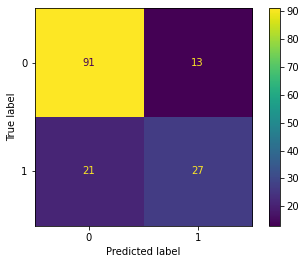

In [61]:
# Menampilkan confusion matrix untuk data test

cm = confusion_matrix(y_test, y_pred_test2, labels=pipe_nb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=pipe_nb.classes_)

disp.plot()
plt.show()

In [62]:
# Classification report pada data test

print(classification_report(y_test,y_pred_test2))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       104
           1       0.68      0.56      0.61        48

    accuracy                           0.78       152
   macro avg       0.74      0.72      0.73       152
weighted avg       0.77      0.78      0.77       152



Berdasarkan hasil confusion matrix dan classification report data test, dapat disimpulkan bahwa:
- Model Naive Bayes berhasil memprediksi sebanyak 88% atau 91 data yang ada pada kelas 0, yaitu kategori 'tidak mengidap diabetes' pada 'Result' dengan benar, tetapi 12% atau sebanyak 13 data salah prediksi. Data yang seharusnya masuk kelas 0, diprediksi oleh model masuk kelas 1, yaitu kategori 'mengidap diabetes' pada 'Result'.
- Selain itu Model Naive Bayes juga berhasil memprediksi sebanyak 56% atau 27 data yang ada pada kelas 1, yaitu kategori 'mengidap diabetes' pada 'Result' dengan benar, tetapi 44% atau sebanyak 21 data salah prediksi. Data yang seharusnya masuk kelas 1, diprediksi oleh model masuk kelas 0, yaitu kategori 'tidak mengidap diabetes' pada 'Result'.

In [63]:
# Menampikan data cross validation

mean_NB = cross_val_score(pipe_nb, X_train, y_train, cv=5).mean()
std_NB = cross_val_score(pipe_nb, X_train, y_train, cv=5).std()
print(mean_NB)
print(std_NB)

0.7590434900419998
0.01726183115814591


### 4. Logistic Regression

In [64]:
# Melakukan prediksi pada train-set dan test-set dengan Logistic Regression

y_pred_train3 = pipe_lr.predict(X_train)
y_pred_test3 = pipe_lr.predict(X_test)

#Data y_pred_train

y_pred_train3

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,

In [65]:
# Melihat akurasi dari train-set dan test-set

print('accuracy score train : ', accuracy_score(y_train,y_pred_train3))
print('accuracy score test : ', accuracy_score(y_test,y_pred_test3))

accuracy score train :  0.7706270627062707
accuracy score test :  0.7697368421052632


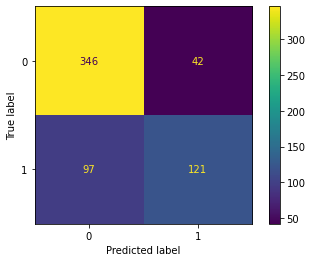

In [66]:
# Menampilkan confusion matrix untuk data train

cm = confusion_matrix(y_train, y_pred_train3, labels=pipe_lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=pipe_lr.classes_)

disp.plot()
plt.show()

In [67]:
# Classification report pada data train

print(classification_report(y_train,y_pred_train3))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       388
           1       0.74      0.56      0.64       218

    accuracy                           0.77       606
   macro avg       0.76      0.72      0.73       606
weighted avg       0.77      0.77      0.76       606



Berdasarkan hasil confusion matrix dan classification report data train, dapat disimpulkan bahwa:
- Model Logistic Regression berhasil memprediksi sebanyak 89% atau 346 data yang ada pada kelas 0, yaitu kategori 'tidak mengidap diabetes' pada 'Result' dengan benar, tetapi 11% atau sebanyak 42 data salah prediksi. Data yang seharusnya masuk kelas 0, diprediksi oleh model masuk kelas 1, yaitu kategori 'mengidap diabetes' pada 'Result'.
- Selain itu Model Logistic Regression juga berhasil memprediksi sebanyak 56% atau 121 data yang ada pada kelas 1, yaitu kategori 'mengidap diabetes' pada 'Result' dengan benar, tetapi 44% atau sebanyak 97 data salah prediksi. Data yang seharusnya masuk kelas 1, diprediksi oleh model masuk kelas 0, yaitu kategori 'tidak mengidap diabetes' pada 'Result'.

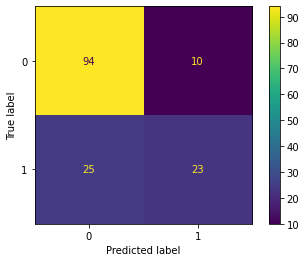

In [68]:
# Menampilkan confusion matrix untuk data test

cm = confusion_matrix(y_test, y_pred_test3, labels=pipe_lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=pipe_lr.classes_)

disp.plot()
plt.show()

In [69]:
# Classification report pada data test

print(classification_report(y_test,y_pred_test3))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       104
           1       0.70      0.48      0.57        48

    accuracy                           0.77       152
   macro avg       0.74      0.69      0.71       152
weighted avg       0.76      0.77      0.76       152



Berdasarkan hasil confusion matrix dan classification report data test, dapat disimpulkan bahwa:
- Model Logistic Regression berhasil memprediksi sebanyak 90% atau 94 data yang ada pada kelas 0, yaitu kategori 'tidak mengidap diabetes' pada 'Result' dengan benar, tetapi 10% atau sebanyak 10 data salah prediksi. Data yang seharusnya masuk kelas 0, diprediksi oleh model masuk kelas 1, yaitu kategori 'mengidap diabetes' pada 'Result'.
- Selain itu Model Logistic Regression juga berhasil memprediksi sebanyak 48% atau 23 data yang ada pada kelas 1, yaitu kategori 'mengidap diabetes' pada 'Result' dengan benar, tetapi 52% atau sebanyak 25 data salah prediksi. Data yang seharusnya masuk kelas 1, diprediksi oleh model masuk kelas 0, yaitu kategori 'tidak mengidap diabetes' pada 'Result'.

In [70]:
# Menampikan data cross validation

mean_LR = cross_val_score(pipe_lr, X_train, y_train, cv=5).mean()
std_LR = cross_val_score(pipe_lr, X_train, y_train, cv=5).std()
print(mean_LR)
print(std_LR)

0.7706408345752608
0.01579991998311409


---
### Cross Validation

In [71]:
# Membuat tabel cross validation

cv = {'model': ['SVM', 'KNN', 'Naive Bayes', 'Logistic Regression'],
      'mean': [mean_SVM, mean_KNN, mean_NB, mean_LR],
      'standard deviation': [std_SVM, std_KNN, std_NB, std_LR]}

data_cv = pd.DataFrame(cv)
data_cv.sort_values('mean', ascending=False)

,model,mean,standard deviation
0,SVM,0.772280,0.023683
3,Logistic Regression,0.770641,0.015800
2,Naive Bayes,0.759043,0.017262
1,KNN,0.739195,0.048419


Pada tabel cross validation, semakin tinggi nilai mean dan semakin rendah nilai standard deviation, maka semakin bagus. Maka dari keempat model yang digunakan, dapat disimpulkan model terbaik adalah SVM dengan nilai mean 0.772280. Maka dari itu model yang akan dilakukan hyperparameter tuning dengan GridSearchCV adalah SVM.

In [72]:
pipe = Pipeline([('preprocessor', preprocessor), ('svm', model_SVM)])

# Menyiapkan parameter untuk GridSearchCV

param_grid = [{'svm__kernel': ['rbf'],
               'svm__C': [0.001, 0.01, 0.1, 1, 10, 100],
               'svm__gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
              {'svm__kernel': ['linear'],
               'svm__C': [0.001, 0.01, 0.1, 1, 10, 100]},
              {'svm__kernel': ['poly'],
               'svm__degree': [2,3,4,5,6,7,8],
               'svm__C': [0.001, 0.01, 0.1, 1, 10, 100]}]

In [73]:
# Melakukan GridSearchCV dengan pipeline model terbaik

grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation accuracy: {:.2f}".format(grid.best_score_))
print("Best parameters: {}".format(grid.best_params_))

Best cross-validation accuracy: 0.78
Best parameters: {'svm__C': 100, 'svm__degree': 2, 'svm__kernel': 'poly'}


In [74]:
model = grid.best_estimator_
model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Pregnancies', 'Glucose',
                                                   'Insulin', 'BMI',
                                                   'DiabetesPedigreeFunction',
                                                   'Age'])])),
                ('svm', SVC(C=100, degree=2, kernel='poly'))])

Berdasarkan hasil GridSearchCV, ditemukan parameter terbaik untuk model SVM adalah dengan nilai C = 100, degree = 2, dan kernel = poly. Maka akan dilakukan prediksi kembali berdasarkan model dengan parameter terbaik.

In [75]:
# Melakukan prediksi pada train-set dan test-set dengan parameter baru

y_pred_train4 = model.predict(X_train)
y_pred_test4 = model.predict(X_test)

#Data y_pred_train

y_pred_train4

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,

In [76]:
# Membandingkan akurasi dari train-set dan test-set sebelum dan setelah hyperparameter tuning

print('Sebelum hyperparameter tuning')
print('accuracy score train : ', accuracy_score(y_train,y_pred_train))
print('accuracy score test : ', accuracy_score(y_test,y_pred_test))
print('\nSetelah hyperparameter tuning')
print('accuracy score train : ', accuracy_score(y_train,y_pred_train4))
print('accuracy score test : ', accuracy_score(y_test,y_pred_test4))

Sebelum hyperparameter tuning
accuracy score train :  0.8003300330033003
accuracy score test :  0.756578947368421

Setelah hyperparameter tuning
accuracy score train :  0.7953795379537953
accuracy score test :  0.7828947368421053


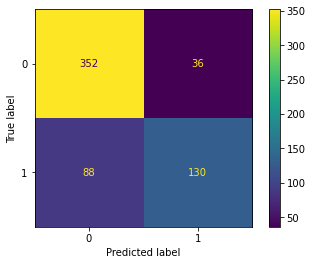

In [77]:
# Menampilkan confusion matrix untuk data train

cm = confusion_matrix(y_train, y_pred_train4, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)

disp.plot()
plt.show()

In [136]:
# Classification report pada data train

print(classification_report(y_train,y_pred_train4))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       388
           1       0.78      0.60      0.68       218

    accuracy                           0.80       606
   macro avg       0.79      0.75      0.76       606
weighted avg       0.79      0.80      0.79       606



Berdasarkan hasil confusion matrix dan classification report data train, dapat disimpulkan bahwa:
- Model SVM Hyperparameter Tuning berhasil memprediksi sebanyak 91% atau 352 data yang ada pada kelas 0, yaitu kategori 'tidak mengidap diabetes' pada 'Result' dengan benar, tetapi 9% atau sebanyak 36 data salah prediksi. Data yang seharusnya masuk kelas 0, diprediksi oleh model masuk kelas 1, yaitu kategori 'mengidap diabetes' pada 'Result'.
- Selain itu Model SVM juga berhasil memprediksi sebanyak 60% atau 130 data yang ada pada kelas 1, yaitu kategori 'mengidap diabetes' pada 'Result' dengan benar, tetapi 40% atau sebanyak 88 data salah prediksi. Data yang seharusnya masuk kelas 1, diprediksi oleh model masuk kelas 0, yaitu kategori 'tidak mengidap diabetes' pada 'Result'.

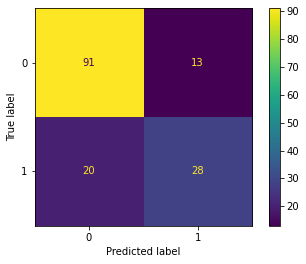

In [138]:
# Menampilkan confusion matrix untuk data test

cm = confusion_matrix(y_test, y_pred_test4, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)

disp.plot()
plt.show()

In [78]:
# Classification report pada data test

print(classification_report(y_test,y_pred_test4))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       104
           1       0.68      0.58      0.63        48

    accuracy                           0.78       152
   macro avg       0.75      0.73      0.74       152
weighted avg       0.78      0.78      0.78       152



Berdasarkan hasil confusion matrix dan classification report data test, dapat disimpulkan bahwa:
- Model SVM Hyperparameter Tuning berhasil memprediksi sebanyak 88% atau 91 data yang ada pada kelas 0, yaitu kategori 'tidak mengidap diabetes' pada 'Result' dengan benar, tetapi 22% atau sebanyak 13 data salah prediksi. Data yang seharusnya masuk kelas 0, diprediksi oleh model masuk kelas 1, yaitu kategori 'mengidap diabetes' pada 'Result'.
- Selain itu Model SVM Hyperparameter Tuning juga berhasil memprediksi sebanyak 58% atau 28 data yang ada pada kelas 1, yaitu kategori 'mengidap diabetes' pada 'Result' dengan benar, tetapi 42% atau sebanyak 20 data salah prediksi. Data yang seharusnya masuk kelas 1, diprediksi oleh model masuk kelas 0, yaitu kategori 'tidak mengidap diabetes' pada 'Result'.

## IX. Model Saving
Dengan melihat hasil evaluasi model, pilihlah model terbaik untuk disimpan. Model terbaik ini akan digunakan kembali dalam melakukan deployment di Heroku.

In [79]:
# Save file untuk data inference

with open('model.pkl', 'wb') as file_1:
    joblib.dump(model, file_1)

## X. Model Inference
Model yang sudah dilatih akan dicoba pada data yang bukan termasuk ke dalam train-set ataupun test-set. Data ini harus dalam format yang asli, bukan data yang sudah di-scaled.

In [80]:
# Mengakses file yang telah di-save untuk data inference

with open('model.pkl', 'rb') as file_1:
    model = joblib.load(file_1)

In [81]:
# Menampilkan data inference-set

data_inf

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Result
0,2,101,58,17,265,24.2,0.614,23,0
1,8,126,88,36,108,38.5,0.349,49,0
2,1,139,62,41,480,40.7,0.536,21,0
3,3,126,88,41,235,39.3,0.704,27,0
4,5,86,68,28,71,30.2,0.364,24,0
5,7,195,70,33,145,25.1,0.163,55,1
6,5,117,86,30,105,39.1,0.251,42,0
7,2,100,66,20,90,32.9,0.867,28,1
8,1,112,72,30,176,34.4,0.528,25,0
9,0,134,58,20,291,26.4,0.352,21,0


In [82]:
# Melakukan prediksi dengan SVM Hyperparameter Tuning

y_pred_inf = model.predict(data_inf)
y_pred_inf

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [84]:
# Membuat dataframe hasil prediksi SVM Hyperparameter Tuning

y_pred_inf_df = pd.DataFrame(y_pred_inf, columns= ['Result Prediction'])
y_pred_inf_df

,Result Prediction
0,0
1,0
2,0
3,0
4,0
5,1
6,0
7,0
8,0
9,0


In [85]:
# Menggabungkan data inference-set dengan result prediction

df_akhir = pd.concat([data_inf, y_pred_inf_df], axis=1)
df_akhir

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Result,Result Prediction
0,2,101,58,17,265,24.2,0.614,23,0,0
1,8,126,88,36,108,38.5,0.349,49,0,0
2,1,139,62,41,480,40.7,0.536,21,0,0
3,3,126,88,41,235,39.3,0.704,27,0,0
4,5,86,68,28,71,30.2,0.364,24,0,0
5,7,195,70,33,145,25.1,0.163,55,1,1
6,5,117,86,30,105,39.1,0.251,42,0,0
7,2,100,66,20,90,32.9,0.867,28,1,0
8,1,112,72,30,176,34.4,0.528,25,0,0
9,0,134,58,20,291,26.4,0.352,21,0,0


Berdasarkan tabel df_akhir, dapat dilihat bahwa terdapat perbedaan hasil antara data aktual dengan data prediksi. Dari 10 data yang digunakan, terdapat 1 data yang berbeda antara data aktual dengan data prediksi.

## XI. Pengambilan Kesimpulan
Berdasarkan data di atas, dapat disimpulkan bahwa:
- Berdasarkan grafik bar plot, dapat diketahui bahwa pada dataset ini terdapat 500 pasien yang masuk ke kategori 0 atau tidak mengidap penyakit diabetes, dan 268 pasien yang masuk ke kategori 1 atau mengidap penyakit diabetes.
- Berdasarkan scatter plot, dapat diketahui bahwa mayoritas orang yang tidak mengidap diabetes memiliki kadar glukosa dan insulin dalam kisaran normal. Serta untuk orang-orang yang berusia sekitar 21-40 tahun dengan nilai BMI kurang dari 30, tidak mengidap diabetes.
- Variable yang memiliki korelasi tinggi dengan 'Result' adalah 'Glucose', 'BMI', dan 'Age'.
- Berdasarkan hasil cross validation, dari 4 model yang digunakan, model yang memiliki nilai mean tertinggi adalah SVM, dengan nilai 0.772280.
- Setelah dilakukan grid search pada model SVM, ditemukan parameter terbaiknya adalah 'C': 100, 'degree': 2, 'kernel': 'poly'. 
- Setelah dilakukan prediksi dengan parameter terbaik, nilai akurasi untuk model SVM meningkat sebanyak 3%, dari 75% menjadi 78%
- Berdasarkan hasil pengujian, diketahui terdapat perbedaan antara nilai aktual Result dengan nilai prediksi Result. Hal ini bisa disebabkan oleh karena adanya data outlier yang tidak ditangani, tingkat keakurasian yang kurang, dan adanya kesalahan dalam pemilihan feature yang digunakan untuk analisis.